**Predict** Student Exam Scores With Linear Regression

Skills: Linear Regression, Scikit-learn, Data Cleaning

What you’ll do:

Clean and visualize data with Pandas/Matplotlib.

Train a Linear Regression model to predict final exam scores.

Evaluate using MAE and R².
Outcome: Your first supervised ML project — shows you can handle structured data.

In [6]:
!pip install kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Step 2: Load and explore your dataset
df = pd.read_csv('StudentsPerformance.csv')

print("=== Dataset Overview ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\n=== Dataset Information ===")
print(df.info())

print("\n=== Basic Statistics ===")
print(df.describe(include='all'))

print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Dataset Overview ===
Dataset shape: (1000, 8)

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0

In [3]:
# Step 3: Data Cleaning
print("Before cleaning:")
print(f"Shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Handle missing values if any
df_cleaned = df.copy()
if df_cleaned.isnull().sum().sum() > 0:
    # Fill numerical missing values with median
    numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
    df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

    # Fill categorical missing values with mode
    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
else:
    print("No missing values found!")

print("\nAfter cleaning:")
print(f"Shape: {df_cleaned.shape}")
print(f"Missing values:\n{df_cleaned.isnull().sum()}")

Before cleaning:
Shape: (1000, 8)
Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate rows: 0
No missing values found!

After cleaning:
Shape: (1000, 8)
Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


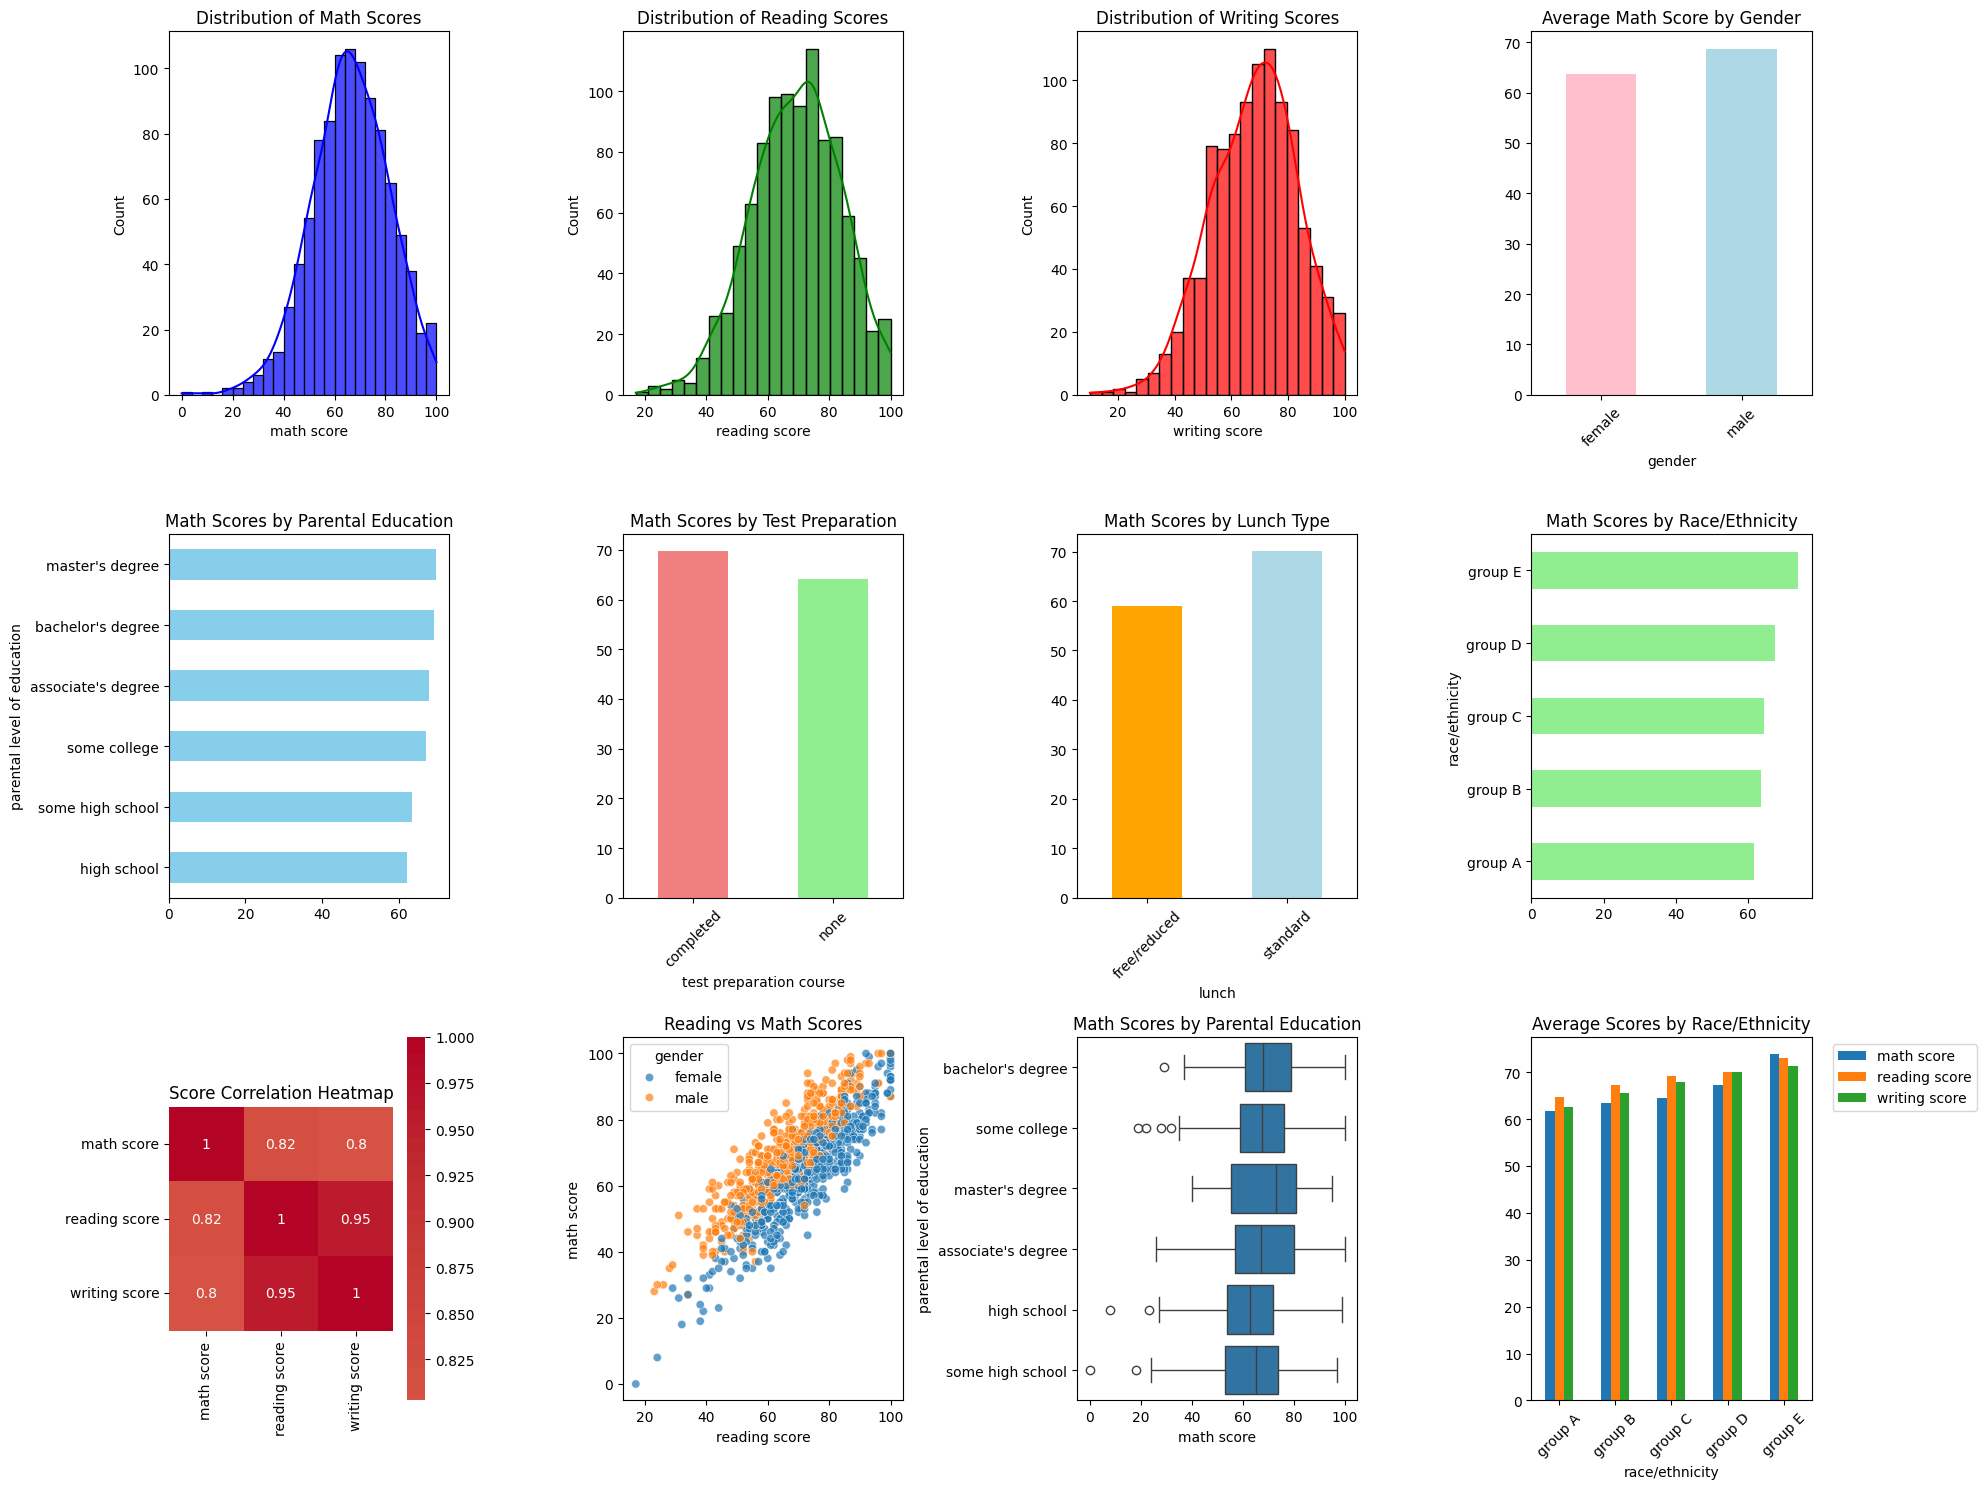

In [4]:
# Step 4: Exploratory Data Analysis and Visualization
plt.figure(figsize=(20, 15))

# Plot 1: Distribution of math, reading, and writing scores
plt.subplot(3, 4, 1)
sns.histplot(df_cleaned['math score'], kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Math Scores')

plt.subplot(3, 4, 2)
sns.histplot(df_cleaned['reading score'], kde=True, color='green', alpha=0.7)
plt.title('Distribution of Reading Scores')

plt.subplot(3, 4, 3)
sns.histplot(df_cleaned['writing score'], kde=True, color='red', alpha=0.7)
plt.title('Distribution of Writing Scores')

# Plot 2: Gender distribution across subjects
plt.subplot(3, 4, 4)
gender_math = df_cleaned.groupby('gender')['math score'].mean()
gender_math.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Average Math Score by Gender')
plt.xticks(rotation=45)

# Plot 3: Parental education level impact
plt.subplot(3, 4, 5)
parental_edu = df_cleaned.groupby('parental level of education')['math score'].mean().sort_values()
parental_edu.plot(kind='barh', color='skyblue')
plt.title('Math Scores by Parental Education')

# Plot 4: Test preparation course impact
plt.subplot(3, 4, 6)
test_prep = df_cleaned.groupby('test preparation course')['math score'].mean()
test_prep.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Math Scores by Test Preparation')
plt.xticks(rotation=45)

# Plot 5: Lunch type impact
plt.subplot(3, 4, 7)
lunch_impact = df_cleaned.groupby('lunch')['math score'].mean()
lunch_impact.plot(kind='bar', color=['orange', 'lightblue'])
plt.title('Math Scores by Lunch Type')
plt.xticks(rotation=45)

# Plot 6: Race/ethnicity impact
plt.subplot(3, 4, 8)
ethnicity_impact = df_cleaned.groupby('race/ethnicity')['math score'].mean().sort_values()
ethnicity_impact.plot(kind='barh', color='lightgreen')
plt.title('Math Scores by Race/Ethnicity')

# Plot 7: Correlation heatmap
plt.subplot(3, 4, 9)
# Create numerical dataframe for correlation
numerical_df = df_cleaned[['math score', 'reading score', 'writing score']]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Score Correlation Heatmap')

# Plot 8: Scatter plot - reading vs math scores
plt.subplot(3, 4, 10)
sns.scatterplot(data=df_cleaned, x='reading score', y='math score', hue='gender', alpha=0.7)
plt.title('Reading vs Math Scores')

# Plot 9: Box plot of math scores by parental education
plt.subplot(3, 4, 11)
sns.boxplot(data=df_cleaned, x='math score', y='parental level of education')
plt.title('Math Scores by Parental Education')

# Plot 10: Average scores by race/ethnicity
plt.subplot(3, 4, 12)
ethnicity_scores = df_cleaned.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
ethnicity_scores.plot(kind='bar', ax=plt.gca())
plt.title('Average Scores by Race/Ethnicity')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
# Step 5: Feature Engineering and Preparation
print("=== Preparing Features for Modeling ===")

# Let's predict math score as our target
target = 'math score'
print(f"Target variable: {target}")

# Create a copy for feature engineering
df_model = df_cleaned.copy()

# Encode categorical variables
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Create interaction features
df_model['total_score'] = df_model['math score'] + df_model['reading score'] + df_model['writing score']
df_model['avg_reading_writing'] = (df_model['reading score'] + df_model['writing score']) / 2

# Select features for modeling
feature_columns = [col for col in df_model.columns if col.endswith('_encoded')] + ['reading score', 'writing score', 'avg_reading_writing']

print(f"\nSelected features: {feature_columns}")

X = df_model[feature_columns]
y = df_model[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

=== Preparing Features for Modeling ===
Target variable: math score
gender: {'female': np.int64(0), 'male': np.int64(1)}
race/ethnicity: {'group A': np.int64(0), 'group B': np.int64(1), 'group C': np.int64(2), 'group D': np.int64(3), 'group E': np.int64(4)}
parental level of education: {"associate's degree": np.int64(0), "bachelor's degree": np.int64(1), 'high school': np.int64(2), "master's degree": np.int64(3), 'some college': np.int64(4), 'some high school': np.int64(5)}
lunch: {'free/reduced': np.int64(0), 'standard': np.int64(1)}
test preparation course: {'completed': np.int64(0), 'none': np.int64(1)}

Selected features: ['gender_encoded', 'race/ethnicity_encoded', 'parental level of education_encoded', 'lunch_encoded', 'test preparation course_encoded', 'reading score', 'writing score', 'avg_reading_writing']
Features shape: (1000, 8)
Target shape: (1000,)


In [8]:
# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training target: {y_train.shape}")
print(f"Testing target: {y_test.shape}")

Data split completed:
Training set: (800, 8)
Testing set: (200, 8)
Training target: (800,)
Testing target: (200,)


In [9]:
# Step 7: Train Linear Regression Model
print("=== Training Linear Regression Model ===")

model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed!")

# Make predictions
y_pred = model.predict(X_test)

print("Predictions generated!")

=== Training Linear Regression Model ===
Model training completed!
Predictions generated!


In [10]:
# Step 8: Model Evaluation
print("=== Model Evaluation ===")

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

# Interpretation
print("\n=== Interpretation ===")
print(f"• MAE of {mae:.2f} means our predictions are typically within {mae:.2f} points of actual math scores")
print(f"• R² of {r2:.4f} indicates the model explains {r2*100:.2f}% of the variance in math scores")
print(f"• RMSE of {rmse:.2f} shows the typical prediction error magnitude")

# Compare with baseline (predicting mean)
baseline_mae = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))
print(f"• Baseline MAE (predicting mean): {baseline_mae:.2f}")
print(f"• Model improvement: {((baseline_mae - mae) / baseline_mae * 100):.1f}% better than baseline")

=== Model Evaluation ===
Mean Absolute Error (MAE): 4.13
R-squared (R²): 0.8838
Root Mean Square Error (RMSE): 5.32

=== Interpretation ===
• MAE of 4.13 means our predictions are typically within 4.13 points of actual math scores
• R² of 0.8838 indicates the model explains 88.38% of the variance in math scores
• RMSE of 5.32 shows the typical prediction error magnitude
• Baseline MAE (predicting mean): 12.34
• Model improvement: 66.5% better than baseline


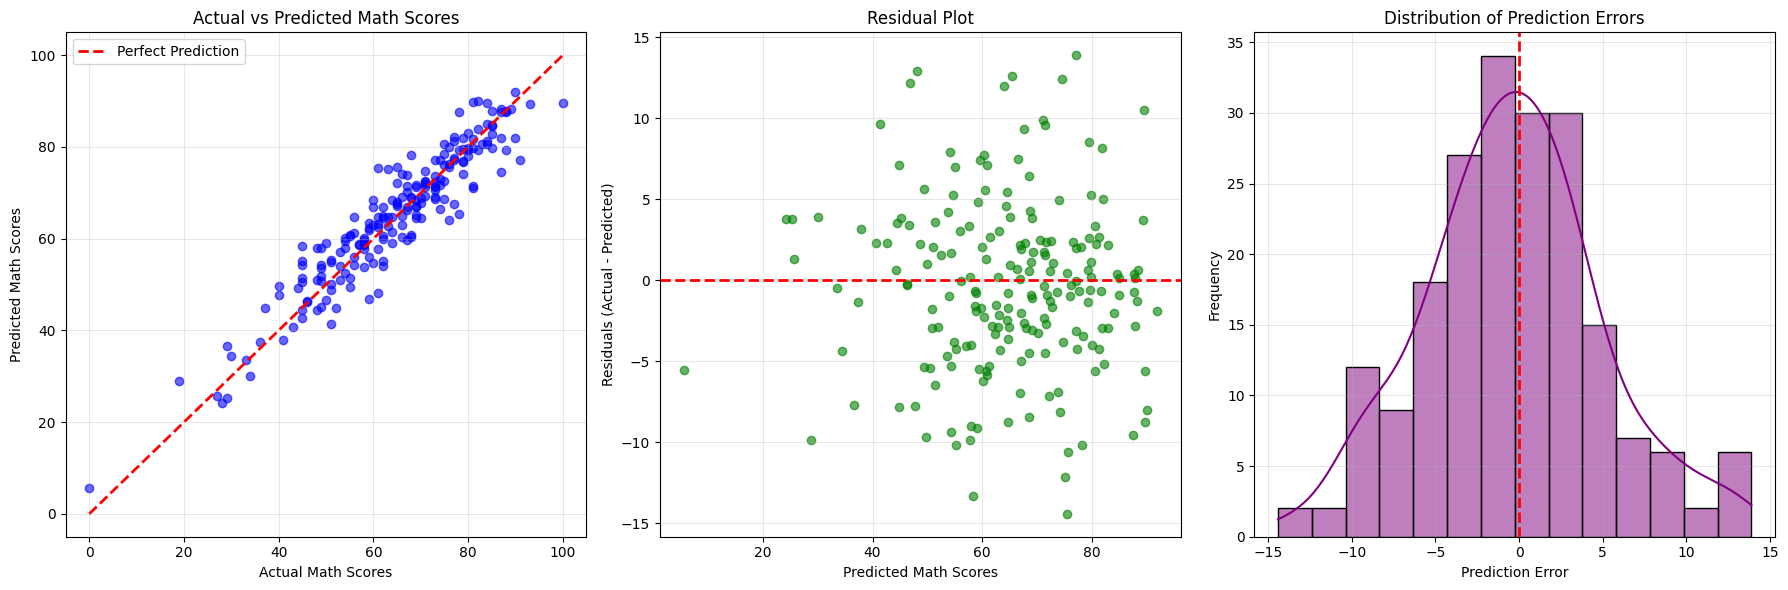

In [11]:
# Step 9: Visualization of Results
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Math Scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 3: Error distribution
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== Feature Importance ===
Feature Importance (sorted by absolute coefficient value):
                               feature  coefficient  abs_coefficient
0                       gender_encoded    12.945330        12.945330
3                        lunch_encoded     3.745377         3.745377
4      test preparation course_encoded     2.739652         2.739652
1               race/ethnicity_encoded     0.845051         0.845051
6                        writing score     0.468115         0.468115
7                  avg_reading_writing     0.316240         0.316240
5                        reading score     0.164364         0.164364
2  parental level of education_encoded     0.155841         0.155841


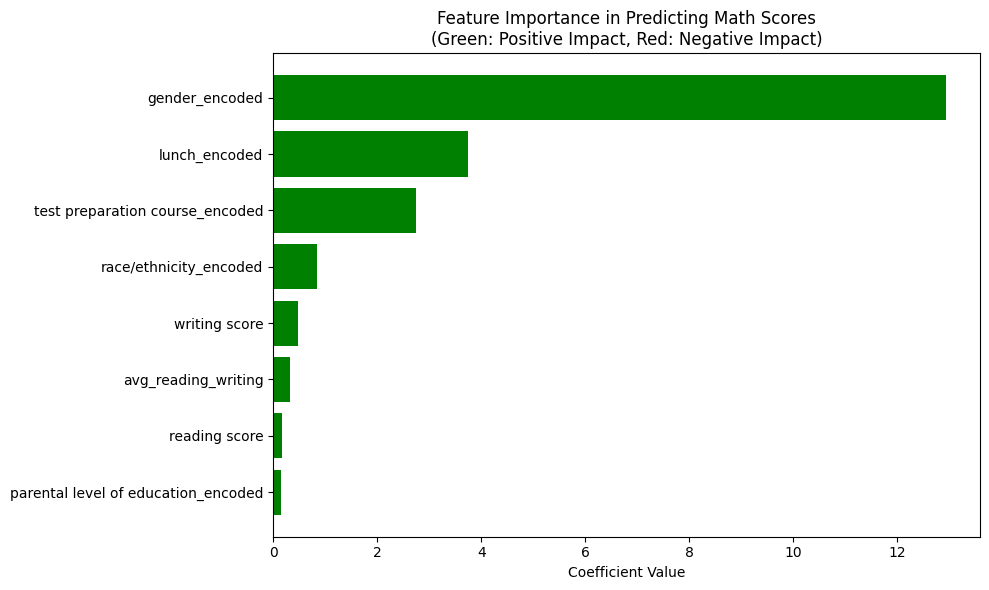


=== Key Insights ===
Top positive influences on math scores:
  • gender_encoded: +12.945
  • lunch_encoded: +3.745
  • test preparation course_encoded: +2.740

Top negative influences on math scores:


In [12]:
# Step 10: Feature Importance Analysis
print("=== Feature Importance ===")

# Get coefficients from linear regression
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("Feature Importance (sorted by absolute coefficient value):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['coefficient']]
plt.barh(feature_importance['feature'], feature_importance['coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Predicting Math Scores\n(Green: Positive Impact, Red: Negative Impact)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n=== Key Insights ===")
top_positive = feature_importance[feature_importance['coefficient'] > 0].head(3)
top_negative = feature_importance[feature_importance['coefficient'] < 0].head(3)

print("Top positive influences on math scores:")
for _, row in top_positive.iterrows():
    print(f"  • {row['feature']}: +{row['coefficient']:.3f}")

print("\nTop negative influences on math scores:")
for _, row in top_negative.iterrows():
    print(f"  • {row['feature']}: {row['coefficient']:.3f}")

In [13]:
# Step 11: Make predictions on new sample students
print("=== Making Predictions on Sample Students ===")

# Create sample students for prediction
sample_students = []

# Sample 1: High performing student
sample1 = {
    'gender': 'female',
    'race/ethnicity': 'group E',
    'parental level of education': "master's degree",
    'lunch': 'standard',
    'test preparation course': 'completed',
    'reading score': 95,
    'writing score': 92
}

# Sample 2: Average student
sample2 = {
    'gender': 'male',
    'race/ethnicity': 'group C',
    'parental level of education': "some college",
    'lunch': 'standard',
    'test preparation course': 'none',
    'reading score': 75,
    'writing score': 72
}

# Sample 3: Struggling student
sample3 = {
    'gender': 'female',
    'race/ethnicity': 'group A',
    'parental level of education': 'high school',
    'lunch': 'free/reduced',
    'test preparation course': 'none',
    'reading score': 55,
    'writing score': 58
}

samples = [sample1, sample2, sample3]

for i, sample in enumerate(samples, 1):
    print(f"\n--- Sample Student {i} ---")

    # Prepare the sample for prediction
    sample_df = pd.DataFrame([sample])

    # Encode categorical variables
    for col in categorical_columns:
        le = label_encoders[col]
        sample_df[col + '_encoded'] = le.transform(sample_df[col])

    # Create interaction features
    sample_df['avg_reading_writing'] = (sample_df['reading score'] + sample_df['writing score']) / 2

    # Select features
    sample_features = sample_df[feature_columns]

    # Make prediction
    predicted_math = model.predict(sample_features)[0]

    print(f"Profile: {sample['gender']}, {sample['race/ethnicity']}, {sample['parental level of education']}")
    print(f"Lunch: {sample['lunch']}, Test Prep: {sample['test preparation course']}")
    print(f"Reading: {sample['reading score']}, Writing: {sample['writing score']}")
    print(f"📊 Predicted Math Score: {predicted_math:.1f}")

=== Making Predictions on Sample Students ===

--- Sample Student 1 ---
Profile: female, group E, master's degree
Lunch: standard, Test Prep: completed
Reading: 95, Writing: 92
📊 Predicted Math Score: 84.4

--- Sample Student 2 ---
Profile: male, group C, some college
Lunch: standard, Test Prep: none
Reading: 75, Writing: 72
📊 Predicted Math Score: 79.6

--- Sample Student 3 ---
Profile: female, group A, high school
Lunch: free/reduced, Test Prep: none
Reading: 55, Writing: 58
📊 Predicted Math Score: 45.7


In [14]:
# Step 12: Final Project Summary
print("🎯 STUDENT MATH SCORE PREDICTION PROJECT")
print("=" * 50)

print("\n📊 DATASET SUMMARY:")
print(f"• Total students: {len(df_cleaned)}")
print(f"• Features: {len(df_cleaned.columns)}")
print(f"• Target variable: Math Score")

print("\n✅ DATA PREPROCESSING:")
print("• Handled missing values: Checked")
print("• Encoded categorical variables: Yes")
print("• Created interaction features: Yes")
print(f"• Final feature set: {len(feature_columns)} features")

print(f"\n📈 MODEL PERFORMANCE:")
print(f"• Mean Absolute Error (MAE): {mae:.2f} points")
print(f"• R-squared (R²): {r2:.4f} ({r2*100:.2f}% variance explained)")
print(f"• Root Mean Square Error (RMSE): {rmse:.2f} points")

print(f"\n🔍 KEY FINDINGS:")
# Get top 3 most important features
top_features = feature_importance.head(3)
for idx, (_, row) in enumerate(top_features.iterrows(), 1):
    impact = "increases" if row['coefficient'] > 0 else "decreases"
    print(f"  {idx}. {row['feature']}: {impact} math score by {abs(row['coefficient']):.3f} points")

print(f"\n💡 PRACTICAL IMPLICATIONS:")
print(f"• Model can predict math scores within {mae:.1f} points on average")
print(f"• Reading and writing scores are strong predictors of math performance")
print(f"• Demographic and socioeconomic factors influence predicted outcomes")

print("\n🚀 BUSINESS VALUE:")
print("• Helps identify students who might need additional support")
print("• Provides insights into factors affecting math performance")
print("• Can be used for early intervention and resource allocation")

print("\n⭐ PROJECT SUCCESS: Your first supervised ML project is complete!")
print("You've demonstrated data cleaning, visualization, linear regression, and model evaluation!")

🎯 STUDENT MATH SCORE PREDICTION PROJECT

📊 DATASET SUMMARY:
• Total students: 1000
• Features: 8
• Target variable: Math Score

✅ DATA PREPROCESSING:
• Handled missing values: Checked
• Encoded categorical variables: Yes
• Created interaction features: Yes
• Final feature set: 8 features

📈 MODEL PERFORMANCE:
• Mean Absolute Error (MAE): 4.13 points
• R-squared (R²): 0.8838 (88.38% variance explained)
• Root Mean Square Error (RMSE): 5.32 points

🔍 KEY FINDINGS:
  1. gender_encoded: increases math score by 12.945 points
  2. lunch_encoded: increases math score by 3.745 points
  3. test preparation course_encoded: increases math score by 2.740 points

💡 PRACTICAL IMPLICATIONS:
• Model can predict math scores within 4.1 points on average
• Reading and writing scores are strong predictors of math performance
• Demographic and socioeconomic factors influence predicted outcomes

🚀 BUSINESS VALUE:
• Helps identify students who might need additional support
• Provides insights into factors af